#### K-Nearest Neighbour


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


#### PREPROCESSING

Load the dataset


In [11]:
import pandas as pd

df = pd.read_csv("multiclass.csv")
print(df.shape)
print(df.head())
print(df.info())


(440, 8)
   Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  class
0       3  12669  9656     7561     214              2674        1338      2
1       3   7057  9810     9568    1762              3293        1776      2
2       3   6353  8808     7684    2405              3516        7844      2
3       3  13265  1196     4221    6404               507        1788      1
4       3  22615  5410     7198    3915              1777        5185      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   class          

Handling missing and duplicates

In [12]:
df=df.drop_duplicates()
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   class             440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64


Filling the values and splitting the features and target

In [ ]:
import numpy as np

for col in df.select_dtypes(include=[np.number]):
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=["object", "category"]):
    df[col] = df[col].fillna(df[col].mode()[0])

X = df.drop(columns=["class"])
y = df["class"]



In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

encoder = LabelEncoder()
y = encoder.fit_transform(df["class"])

X = df.drop(columns=["class"])
X = pd.get_dummies(X, drop_first=False)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (308, 7) (308,)
Test shape: (132, 7) (132,)


#### Scratch Implimentation of KNN

K=1, Accuracy=0.8864
K=2, Accuracy=0.8864
K=3, Accuracy=0.9318
K=4, Accuracy=0.9394
K=5, Accuracy=0.9091
K=6, Accuracy=0.8939
K=7, Accuracy=0.8939
K=8, Accuracy=0.9015
K=9, Accuracy=0.8788
K=10, Accuracy=0.8712

✅ The best accuracy came at K=4 with value 0.9394



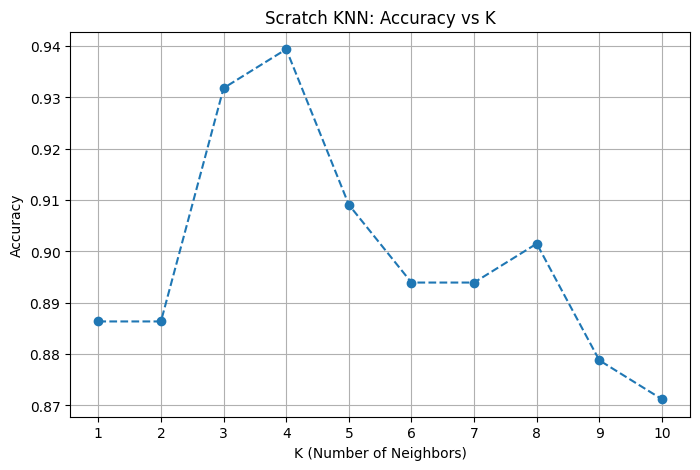

📊 Classification Report (Best K):
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.98      0.94      0.96        54
           2       0.93      1.00      0.96        52

    accuracy                           0.94       132
   macro avg       0.93      0.92      0.92       132
weighted avg       0.94      0.94      0.94       132



In [27]:
from collections import Counter
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

class KNN_Scratch:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        distances = [math.dist(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


# Evaluate scratch KNN for k=1 to 10
k_values = range(1, 11)
accuracies = []
maxK = 0
index_K = 0

for k in k_values:
    knn_scratch = KNN_Scratch(k=k)
    knn_scratch.fit(X_train, y_train)
    y_pred_scratch = knn_scratch.predict(X_test)
    accuracy = np.mean(y_pred_scratch == y_test)
    accuracies.append(accuracy)
    
    if accuracy > maxK:
        maxK = accuracy
        index_K = k

    print(f"K={k}, Accuracy={accuracy:.4f}")

print(f"\n✅ The best accuracy came at K={index_K} with value {maxK:.4f}\n")

# Plot Accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o', linestyle='--')
plt.title("Scratch KNN: Accuracy vs K")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Generate Classification Report for best K
best_knn = KNN_Scratch(k=index_K)
best_knn.fit(X_train, y_train)
y_best_pred = best_knn.predict(X_test)

print("📊 Classification Report (Best K):")
print(classification_report(y_test, y_best_pred))


#### KNN with Scikit-Learn

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_sklearn = knn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print("Sklearn KNN Accuracy:", accuracy_sklearn)
print("\nClassification Report:\n", classification_report(y_test, y_pred_sklearn))


Sklearn KNN Accuracy: 0.9318181818181818

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83        26
           1       0.98      0.94      0.96        54
           2       0.94      0.96      0.95        52

    accuracy                           0.93       132
   macro avg       0.91      0.92      0.91       132
weighted avg       0.93      0.93      0.93       132

